## KMEANS CLUSTERING 

Project follows the CRISP-DM Process while analyzing their data.

PROBLEM :
PREDICT THE CLUSTER OF CUSTOMERS BASED ON ANNUAL INCOME AND SPENDING TO BRING VALUABLE INSIGHTS FOR THE MALL. 

## Questions :
## 1.Which cluster has  both spending good score and income?
## 2.On which cluster should company concentrate to increase sales?
## 3.which cluster has maximum probability to get into high spending score?

# IMPORTING THE DATASET AND LIBRARIES 


In [56]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [57]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\neeraj\OneDrive\Desktop\data challenge\Mall_Customers.csv')
X=dataset.iloc[:,:].values


## Explore the Dataset 

In [58]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Check for categories in object variable(categorical variable)

In [61]:
dataset['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

## Replace categories by one hot encoding 
Here this method works fine as there are only 2 categories in object variable 

In [62]:
labelencoder_X=LabelEncoder()

In [63]:
X[:,1]= labelencoder_X.fit_transform(X[:,1])

In [64]:
Data=pd.DataFrame(X)

## Now check for categorical values if any

In [65]:
Data.head()

,0,1,2,3,4
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## loading data (test and train)

In [66]:
x= dataset.iloc[:, [3,4]].values

In [67]:
Final=pd.DataFrame(x)

In [68]:
Final.head()

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##  USING ELBOW METHOD FOR OPTIMAL CLUSTERS 

Here I have used a function which taken in the 'i' value and returns the graph between 'i' and WCSS(Sum of squares of distances within clusters)

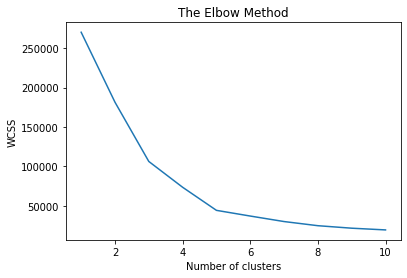

In [73]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the model 

In [74]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)


In [75]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## LETS VISUALISE OUR RESULT 

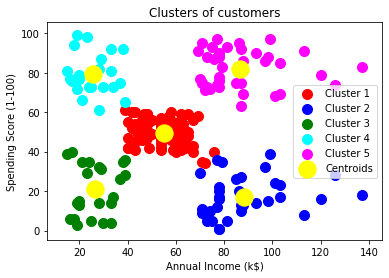

In [77]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Our insights are :

## 1. Cluster 1 has an average income of 60k and  has spending score of 50 on an average .

## 2. Cluster 2 has an average of 90k and has spending score of 18  on an average .

## 3.Cluster 3 has an average income of 30k and  has spending score of 20 on an average .

## 4.Cluster 4 has an average income of 30k and  has spending score of 80 on an average.

## 5.Cluster 5 has an average income of 85k and  has spending score of 80 on an average.


## Deeper intution(Answering our questions)

## Customers Belonging to cluster 4 and 5 are having good spending score so are valuable  for our mall .(Can give special cards , discounts etc)

## Customers Belonging to cluster 2 should have a high spending score henceforth the company should concentrate on these type of customers for increasing profits.

## Customers Belonging to cluster 1 should be given discounts to increase the spending score 